In [32]:
import json
import numpy as np
import gzip
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing

#Part 1.1,1.2 open file and create numpy array for post,emotion and sentiment
fJson=gzip.open("goemotions.json.gz")
data=json.load(fJson)
NumpyArr = np.array(data)

   
npArr=np.hsplit(NumpyArr,3)
#reddit comments
x=np.array(npArr[0]).flatten()
#emotions
y=np.array(npArr[1]).flatten()   
#sentiments   
z=np.array(npArr[2]).flatten()
  


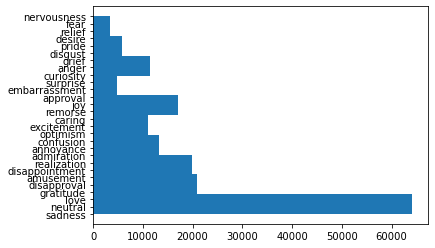

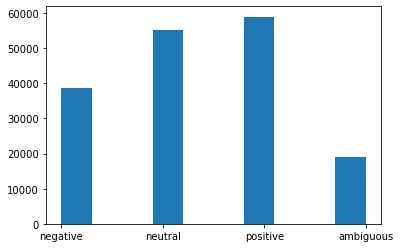

In [8]:
#part 1.3 display histogram of emotion and sentiment to see if data is balanced
plt.hist(y,orientation='horizontal')
plt.show() 

plt.hist(z)
plt.show()

In [9]:
#part 2.1 extract vocabulary 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)
print(X.toarray())
print("list of words:",vectorizer.get_feature_names_out())
print("number of tokens/size of the vocabulary:",len(vectorizer.get_feature_names_out()))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
list of words: ['00' '000' '00001' ... '병무청' '카니발' 'ﾉωﾉ']
number of tokens/size of the vocabulary: 30449


In [21]:
#part 2.2
dataSplitX=train_test_split(x,test_size=0.2,shuffle=False)
dataSplitY=train_test_split(y,test_size=0.2, shuffle=False)
dataSplitZ=train_test_split(z,test_size=0.2, shuffle=False)


['That game hurt.' "You do right, if you don't care then fuck 'em!"
 'Man I love reddit.' ...
 "Nah, that's ArmedForcesUpdate, always good for a laugh"
 "but then you have it stick to your lips and give you one of those cold-sore lookin' burns."
 '[NAME] pnr play has not been good, they are defending jok and letting him get to the rim']
['sadness' 'neutral' 'love' ... 'amusement' 'neutral' 'disapproval']
['negative' 'neutral' 'positive' ... 'positive' 'neutral' 'negative']


In [ ]:
tempY=[]
tempZ=[]
vectorizer = CountVectorizer()
Y = vectorizer.fit_transform(y)
for emotions in vectorizer.get_feature_names_out():
    tempY.append((y==emotions).sum()/y.size)
vectorizer = CountVectorizer()
Z = vectorizer.fit_transform(z)
for sentiment in vectorizer.get_feature_names_out(): 
    tempZ.append((z==sentiment).sum()/z.size)
priorY=np.array(tempY)
priorZ=np.array(tempZ)
print("priorY",priorY)
print("pritorZ",priorZ)

In [30]:
#2.3.1 base Multinomial Naive bayes classifier
vectorizer = CountVectorizer()
trainX = vectorizer.fit_transform(dataSplitX[0])

#MNB for Emotions
classifier = MultinomialNB()
model = classifier.fit(trainX,dataSplitY[0])
MultinomialNB()
count=0
for i in range (len(dataSplitX[1])):
    post=dataSplitX[1][i]
    new_post = vectorizer.transform(np.array([post]))
    predict = model.predict(new_post)
    if(predict==dataSplitY[1][i]):
        count+=1
print("accuracy emotions:",count/len(dataSplitX[1]))

#MNB for sentiment
classifier = MultinomialNB()
model = classifier.fit(trainX,dataSplitZ[0])
MultinomialNB()
count=0
for i in range (len(dataSplitX[1])):
    post=dataSplitX[1][i]
    new_post = vectorizer.transform(np.array([post]))
    predict = model.predict(new_post)
    if(predict==dataSplitZ[1][i]):
        count+=1
print("accuracy sentiment:",count/len(dataSplitX[1]))


accuracy Y 0.3842684204399953
accuracy Z 0.5481899662437435


In [36]:
#2.3.2 base decision tree classifier
#decision tree for emotions
le = preprocessing.LabelEncoder()
for i in range(len(x)):
    x[:, i] = le.fit_transform(x[:, i])
dataSplitX=train_test_split(x,test_size=0.2,shuffle=False)

dtc = tree.DecisionTreeClassifier()
dtc.fit(dataSplitX[0], dataSplitY[0])
for i in range (len(dataSplitX[1])):
    post=dataSplitX[1][i]
    new_post = vectorizer.transform(np.array([post]))
    predict = model.predict(new_post)
    if(predict==dataSplitY[1][i]):
        count+=1
print("accuracy Y",count/len(dataSplitX[1]))

#decision tree for sentiment
dtc = tree.DecisionTreeClassifier()
dtc.fit(dataSplitX[0], dataSplitZ[0])
for i in range (len(dataSplitX[1])):
    post=dataSplitX[1][i]
    new_post = vectorizer.transform(np.array([post]))
    predict = model.predict(new_post)
    if(predict==dataSplitZ[1][i]):
        count+=1
print("accuracy Z",count/len(dataSplitX[1]))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
#2.3.3 base multilayered perceptron



In [ ]:
#2.3.4 multinomial bayes classifer with gridSearchCV, experiment with hyperParameter alphaFloat




In [ ]:
#2.3.5 decision Tree with gridsearchCV to change 
#criterion: gini or entropy
#• max depth: 2 different values of your choice
#• min samples split: 3 different values of your choice





In [ ]:
#2.3.6 multi layered perceptron using gridsearchCV with experiments on hyperParameter
#activation: sigmoid, tanh, relu and identity
#2 network architectures of your choice: for eg, 2 hidden layers with 30+ 50 nodes and 3 hidden layers with 10 + 10 + 10
# solver: Adam and stochastic gradient descent



In [ ]:
#2.4 create file with performance and confusion matrix for each classifier

In [ ]:
#2.5 experiment with 1 option:


In [ ]:
#3 embeddings
